In [1]:
!wget https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip

--2019-08-02 16:51:47--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.40.212
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.40.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948965311 (905M) [application/zip]
Saving to: ‘HE_Challenge_data.zip’

HE_Challenge_data.z 100%[===================>] 905.00M  71.4MB/s    in 15s     

2019-08-02 16:52:02 (59.8 MB/s) - ‘HE_Challenge_data.zip’ saved [948965311/948965311]



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
PATH = Path('/content/gdrive/My Drive/GardeNerd/data/data')

In [4]:
train_df = pd.read_csv(PATH/'train.csv')

In [5]:
train_df.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [6]:
img = plt.imread(PATH/'train'/'0.jpg')

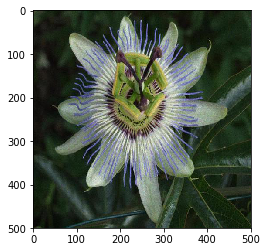

In [7]:
plt.imshow(img)

In [8]:
def getdata(sz,bs,suffix='.jpg'):
    data = ImageDataBunch.from_df(PATH,train_df,'train',suffix=suffix,
                              size = sz, bs=bs,ds_tfms=get_transforms(flip_vert=True,max_lighting=0.75),num_workers=8).normalize()
    return data

In [9]:
sz = 128
bs = 64

In [10]:
data = getdata(sz,bs)

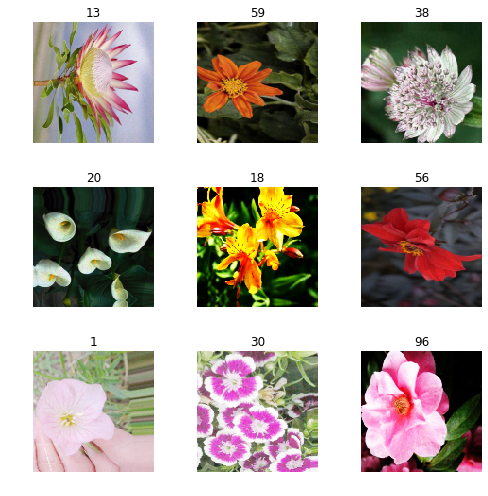

In [13]:
data.show_batch(rows=3,figsize=(7,7))

In [13]:
learn = cnn_learner(data,models.resnet18,pretrained=True,metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 25857359.18it/s]


In [24]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.091107,0.955026,0.737325,03:30
1,1.187770,0.536597,0.845739,03:31
2,0.952605,0.459420,0.868393,03:32


In [25]:
learn.save('stage-1')

In [30]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.680192,0.280535,0.923948,03:39


In [31]:
learn.save('stage-2')

In [14]:
learn.load('stage-2');

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


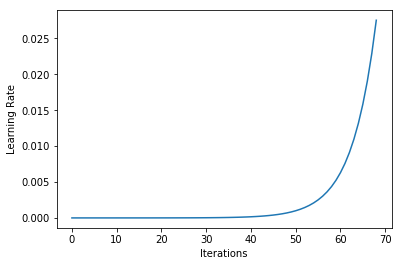

In [38]:
learn.recorder.plot_lr()

# Submission

In [16]:
sample_df = pd.read_csv(PATH/'sample_submission.csv')
learn.data.add_test(ImageList.from_df(sample_df,PATH,folder='test',suffix='.jpg'))

In [44]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

sample_df.category = preds.argmax(1) + 1
sample_df.head()

sample_df.to_csv('submission.csv',index=False)

In [45]:
sample_df.head()

,image_id,category
0,18540,9
1,18541,40
2,18542,87
3,18543,72
4,18544,51
